# CLIP Models test
In this notebook we are gonna test some OpenClip pretrained models to test these on both persian and english language to test them out.

model that we aare going to test:
- ViT-H-14-378-quickgelu, dfn5b
- ViT-H-14-quickgelu, dfn5b
- EVA02-E-14-plus, laion2b_s9b_b144k
- ViT-SO400M-14-SigLIP, webli
- ViT-L-14-quickgelu, dfn2b
- ViT-L-14, datacomp_xl_s13b_b90k
- ViT-B/32, openai
- [clip-fa-text](https://huggingface.co/SajjadAyoubi/clip-fa-text)

First lets write down images that we want to test and some query that is good match for each picture.

In [3]:
! pip install open_clip_torch matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 71.9 MB/s eta 0:00:00


In [19]:
images_path = {
    "bilboard-mahris.png": "بیلبورد ماهریس در خیابان یاس با ارسال رایگان",
    "drag-race.jpeg": "مسابقه درگ بین دو تا ماشین کلاسیک",
    "magazine-danestaniha.jpeg": "مجله دانستنیها درمورد تسلا",
    "pixel.png": "مسئله بسته بندی و راه حل خلاقانه آن",
    "orange-juice.jpeg": "آب پرتقال طبیعی با پالپ ساخته شدده در آمریکا"
}

These are all of the openClip pre trained models and their pretrain tag:

In [2]:
import open_clip

open_clip.list_pretrained()

[('RN50', 'openai'),
 ('RN50', 'yfcc15m'),
 ('RN50', 'cc12m'),
 ('RN50-quickgelu', 'openai'),
 ('RN50-quickgelu', 'yfcc15m'),
 ('RN50-quickgelu', 'cc12m'),
 ('RN101', 'openai'),
 ('RN101', 'yfcc15m'),
 ('RN101-quickgelu', 'openai'),
 ('RN101-quickgelu', 'yfcc15m'),
 ('RN50x4', 'openai'),
 ('RN50x16', 'openai'),
 ('RN50x64', 'openai'),
 ('ViT-B-32', 'openai'),
 ('ViT-B-32', 'laion400m_e31'),
 ('ViT-B-32', 'laion400m_e32'),
 ('ViT-B-32', 'laion2b_e16'),
 ('ViT-B-32', 'laion2b_s34b_b79k'),
 ('ViT-B-32', 'datacomp_xl_s13b_b90k'),
 ('ViT-B-32', 'datacomp_m_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_clip_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_laion_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_image_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_text_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_basic_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_s128m_b4k'),
 ('ViT-B-32', 'datacomp_s_s13m_b4k'),
 ('ViT-B-32', 'commonpool_s_clip_s13m_b4k'),
 ('ViT-B-32', 'commonpool_s_laion_s13m_b4k'),
 ('ViT-B-32', 'commonpool_

first lets create a function to get the similarities.

In [5]:
from PIL import Image
import torch


def get_similarities(model, preprocess, text_tokenized):
  similarities = {}

  for path in images_path.keys():
    image = preprocess(Image.open(path)).unsqueeze(0)

    with torch.no_grad(), torch.cuda.amp.autocast():
      image_features = model.encode_image(image)
      text_features = model.encode_text(text_tokenized)
      image_features /= image_features.norm(dim=-1, keepdim=True)
      text_features /= text_features.norm(dim=-1, keepdim=True)

      text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)

    similarities[path] = text_probs[0]

  return similarities

we test each of models one by one. lets go with ViT-H-14-378-quickgelu first


In [1]:
import open_clip

model, _, preprocess = open_clip.create_model_and_transforms('ViT-H-14-378-quickgelu', pretrained='dfn5b')
model.eval()
tokenizer = open_clip.get_tokenizer('ViT-H-14-378-quickgelu')

text_tokenized = tokenizer(images_path.values())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/open_clip/factory.py:129: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be fli

In [12]:
import pandas as pd

df = pd.DataFrame(get_similarities(model, preprocess, text_tokenized))
df

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
<ipython-input-11-55c9c7a925c9>:13: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast():
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:265: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


,bilboard-mahris.png,drag-race.jpeg,magazine-danestaniha.jpeg,pixel.png,orange-juice.jpeg
0,0.203228,0.133481,0.000970,0.002295,0.865743
1,0.281211,0.788200,0.445127,0.010359,0.118976
2,0.111085,0.006297,0.531020,0.113493,0.002020
3,0.195558,0.047372,0.021504,0.870198,0.012218
4,0.208917,0.024650,0.001380,0.003655,0.001042


<Axes: >

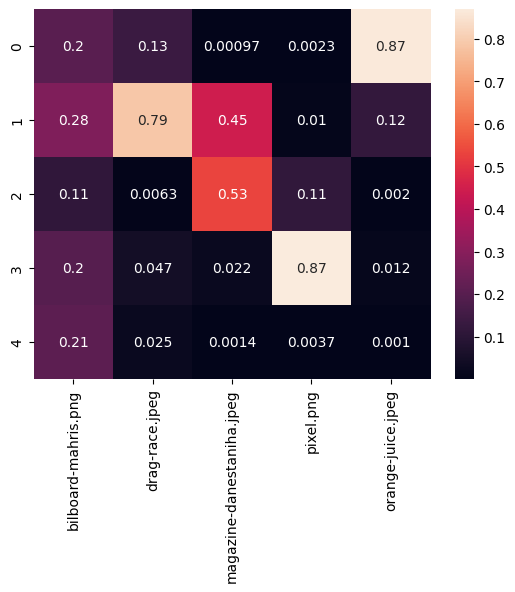

In [14]:
import seaborn as sns

sns.heatmap(df, annot=True)

as we see we haven't a great job in here but not that bad.
lets move to next one

In [6]:
model, _, preprocess = open_clip.create_model_and_transforms('ViT-H-14-quickgelu', pretrained='dfn5b')
model.eval()
tokenizer = open_clip.get_tokenizer('ViT-H-14-quickgelu')
text_tokenized = tokenizer(images_path.values())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/open_clip/factory.py:129: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be fli

In [7]:
import pandas as pd

df = pd.DataFrame(get_similarities(model, preprocess, text_tokenized))
df

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
<ipython-input-5-5daa58598c7c>:11: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast():
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:265: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


,bilboard-mahris.png,drag-race.jpeg,magazine-danestaniha.jpeg,pixel.png,orange-juice.jpeg
0,0.061979,0.091903,0.002631,0.000223,0.601710
1,0.279599,0.861853,0.320397,0.007798,0.194185
2,0.178976,0.011344,0.584331,0.697167,0.014145
3,0.354747,0.020516,0.089233,0.254427,0.186795
4,0.124700,0.014384,0.003409,0.040385,0.003164


<Axes: >

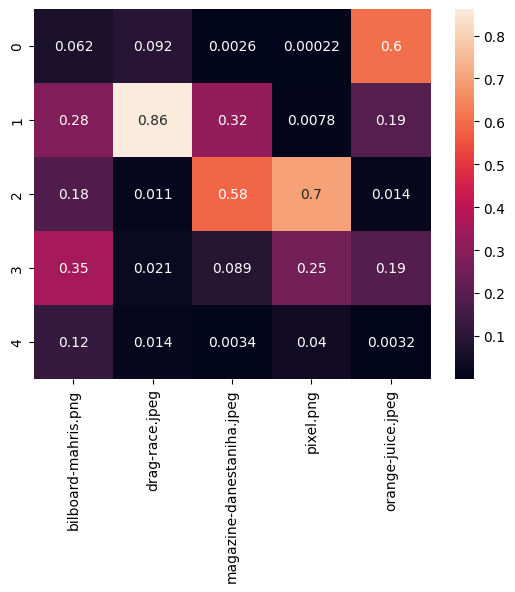

In [8]:
import seaborn as sns

sns.heatmap(df, annot=True)

again... not a great accuracy. lets move on

In [ ]:
import open_clip

model, _, preprocess = open_clip.create_model_and_transforms('EVA02-E-14-plus', pretrained='laion2b_s9b_b144k')
model.eval()
tokenizer = open_clip.get_tokenizer('EVA02-E-14-plus')
text_tokenized = tokenizer(images_path.values())

In [ ]:
import pandas as pd

df = pd.DataFrame(get_similarities(model, preprocess, text_tokenized))
df

In [ ]:
import seaborn as sns

sns.heatmap(df, annot=True)

not what we want...

In [3]:
import open_clip

model, _, preprocess = open_clip.create_model_and_transforms('ViT-SO400M-14-SigLIP', pretrained='webli')
model.eval()
tokenizer = open_clip.get_tokenizer('ViT-SO400M-14-SigLIP')
text_tokenized = tokenizer(images_path.values())

In [7]:
import pandas as pd

df = pd.DataFrame(get_similarities(model, preprocess, text_tokenized))
df

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
<ipython-input-5-5daa58598c7c>:11: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast():
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:265: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


,bilboard-mahris.png,drag-race.jpeg,magazine-danestaniha.jpeg,pixel.png,orange-juice.jpeg
0,0.486536,0.202048,0.016853,0.065105,0.136017
1,0.084654,0.218901,0.102459,0.053533,0.024922
2,0.231229,0.205700,0.688502,0.345343,0.056236
3,0.121673,0.251632,0.073495,0.463707,0.193830
4,0.075909,0.121720,0.118691,0.072312,0.588995


<Axes: >

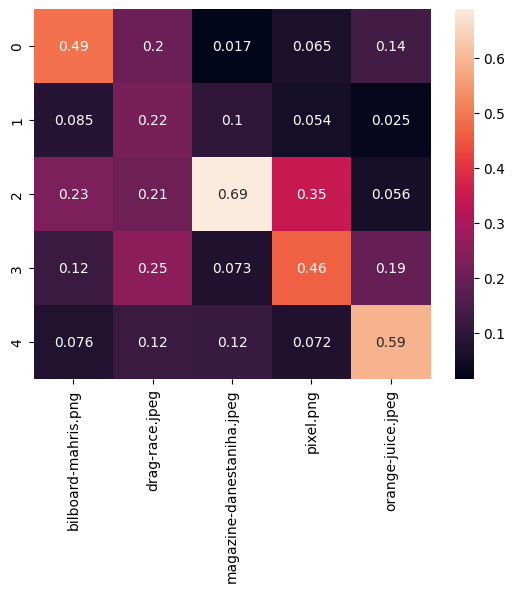

In [8]:
import seaborn as sns

sns.heatmap(df, annot=True)

i think that was our best result

In [9]:
import open_clip

model, _, preprocess = open_clip.create_model_and_transforms('ViT-L-14-quickgelu', pretrained='dfn2b')
model.eval()
tokenizer = open_clip.get_tokenizer('ViT-L-14-quickgelu')
text_tokenized = tokenizer(images_path.values())

open_clip_pytorch_model.bin:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/open_clip/factory.py:129: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=map_loc

In [10]:
import pandas as pd

df = pd.DataFrame(get_similarities(model, preprocess, text_tokenized))
df

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
<ipython-input-5-5daa58598c7c>:11: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast():
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:265: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


,bilboard-mahris.png,drag-race.jpeg,magazine-danestaniha.jpeg,pixel.png,orange-juice.jpeg
0,0.146868,0.080275,0.192807,0.018085,0.071345
1,0.475747,0.640737,0.465595,0.564699,0.790088
2,0.139387,0.248227,0.148420,0.136079,0.128157
3,0.179488,0.016684,0.122361,0.247820,0.009894
4,0.058511,0.014077,0.070817,0.033318,0.000516


<Axes: >

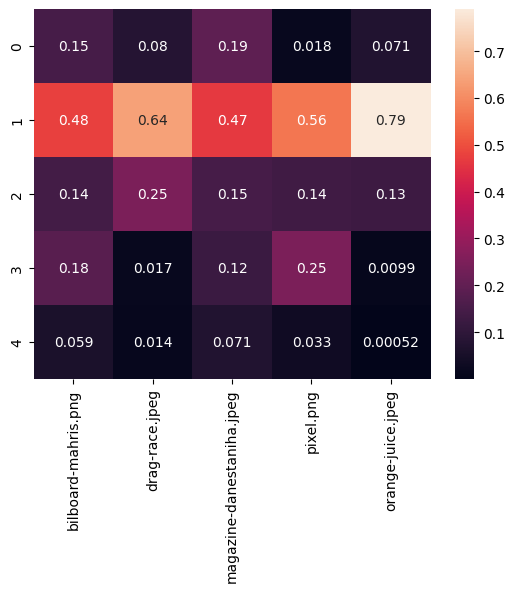

In [11]:
import seaborn as sns

sns.heatmap(df, annot=True)

Naah

In [12]:
import open_clip

model, _, preprocess = open_clip.create_model_and_transforms('ViT-L-14', pretrained='datacomp_xl_s13b_b90k')
model.eval()
tokenizer = open_clip.get_tokenizer('ViT-L-14')
text_tokenized = tokenizer(images_path.values())

open_clip_pytorch_model.bin:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/open_clip/factory.py:129: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=map_loc

In [13]:
import pandas as pd

df = pd.DataFrame(get_similarities(model, preprocess, text_tokenized))
df

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
<ipython-input-5-5daa58598c7c>:11: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast():
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:265: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


,bilboard-mahris.png,drag-race.jpeg,magazine-danestaniha.jpeg,pixel.png,orange-juice.jpeg
0,0.751867,0.033210,0.256390,0.744202,0.067191
1,0.120152,0.116826,0.342804,0.056076,0.059863
2,0.109169,0.721193,0.333449,0.012693,0.409796
3,0.004038,0.045176,0.009765,0.017987,0.247888
4,0.014774,0.083595,0.057592,0.169042,0.215261


<Axes: >

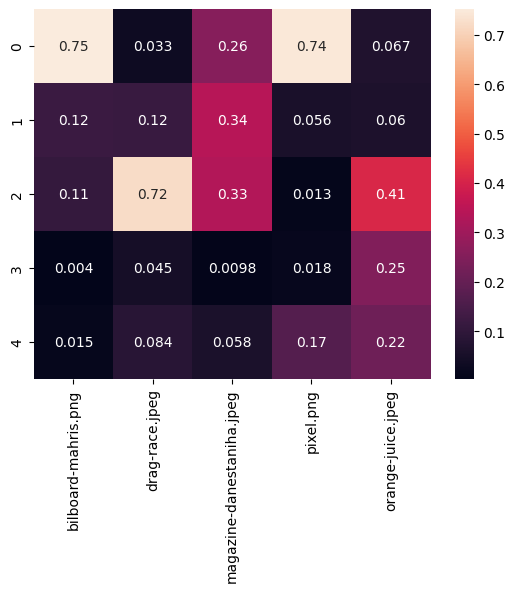

In [14]:
import seaborn as sns

sns.heatmap(df, annot=True)

answers are so diverse ...

In [16]:
import open_clip

model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='openai')
model.eval()
tokenizer = open_clip.get_tokenizer('ViT-B-32')
text_tokenized = tokenizer(images_path.values())

In [17]:
import pandas as pd

df = pd.DataFrame(get_similarities(model, preprocess, text_tokenized))
df

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
<ipython-input-5-5daa58598c7c>:11: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast():
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:265: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


,bilboard-mahris.png,drag-race.jpeg,magazine-danestaniha.jpeg,pixel.png,orange-juice.jpeg
0,0.068617,0.475569,0.216434,0.095224,0.022362
1,0.007354,0.010354,0.004724,0.064690,0.132133
2,0.177934,0.122799,0.406114,0.379822,0.429115
3,0.403036,0.172016,0.308816,0.355132,0.392571
4,0.343060,0.219262,0.063913,0.105132,0.023819


<Axes: >

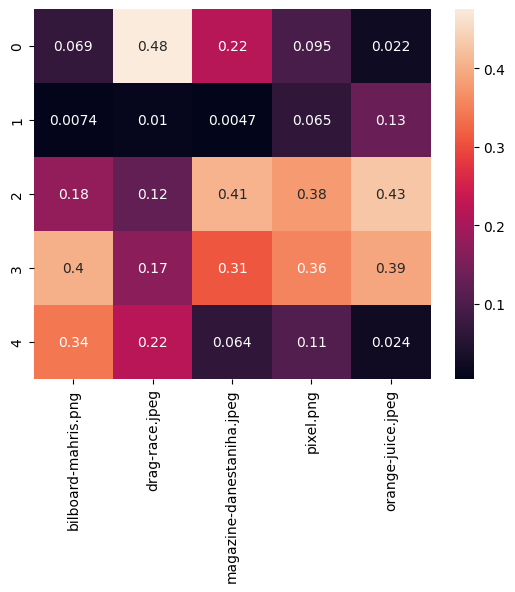

In [18]:
import seaborn as sns

sns.heatmap(df, annot=True)

i mean there is no good model that can handle persian language ?

In [23]:
from transformers import CLIPVisionModel, RobertaModel, AutoTokenizer, CLIPFeatureExtractor

vision_encoder = CLIPVisionModel.from_pretrained('SajjadAyoubi/clip-fa-vision')
preprocessor = CLIPFeatureExtractor.from_pretrained('SajjadAyoubi/clip-fa-vision')
text_encoder = RobertaModel.from_pretrained('SajjadAyoubi/clip-fa-text')
tokenizer = AutoTokenizer.from_pretrained('SajjadAyoubi/clip-fa-text')

config.json:   0%|          | 0.00/4.37k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/350M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/728 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/473M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/354 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/875k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.12M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [31]:
image_embedding.norm(dim=-1, keepdim=True)

tensor([[25.2418]], grad_fn=<LinalgVectorNormBackward0>)

In [43]:
cosine_similarity(a,b)

array([[0.36243793]], dtype=float32)

In [42]:
a = text_embedding.pooler_output.cpu().detach().numpy()
b = image_embedding.pooler_output.cpu().detach().numpy()


In [45]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = {}

for path in images_path.keys():
  queries_similarity = []
  for question in images_path.values():
    image = Image.open(path)
    text_embedding = text_encoder(**tokenizer(question, return_tensors='pt')).pooler_output
    image_embedding = vision_encoder(**preprocessor(image, return_tensors='pt')).pooler_output

    text_embedding /= text_embedding.norm(dim=-1, keepdim=True)
    image_embedding /= image_embedding.norm(dim=-1, keepdim=True)

    text_vector = text_embedding.cpu().detach().numpy()
    image_vector = image_embedding.cpu().detach().numpy()

    queries_similarity.append(cosine_similarity(text_vector, image_vector)[0][0])

  similarities[path] = queries_similarity

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [46]:
import pandas as pd

df = pd.DataFrame(get_similarities(model, preprocess, text_tokenized))
df

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
<ipython-input-5-5daa58598c7c>:11: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast():
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:265: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


,bilboard-mahris.png,drag-race.jpeg,magazine-danestaniha.jpeg,pixel.png,orange-juice.jpeg
0,0.068617,0.475569,0.216434,0.095224,0.022362
1,0.007354,0.010354,0.004724,0.064690,0.132133
2,0.177934,0.122799,0.406114,0.379822,0.429115
3,0.403036,0.172016,0.308816,0.355132,0.392571
4,0.343060,0.219262,0.063913,0.105132,0.023819


<Axes: >

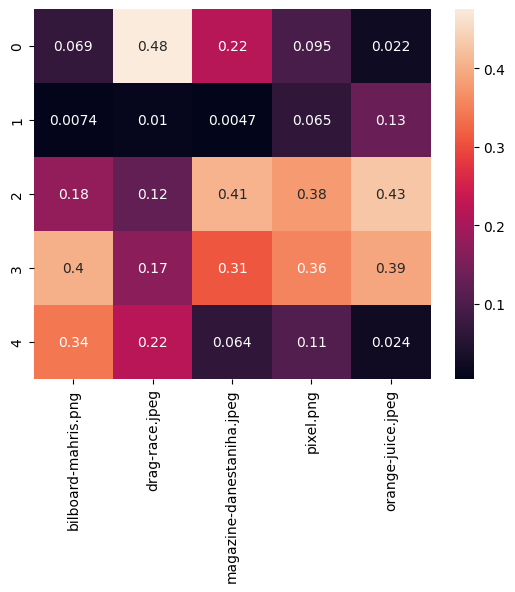

In [47]:
import seaborn as sns

sns.heatmap(df, annot=True)